In [1]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.ML.Descriptors.Descriptors import DescriptorCalculator
import numpy as np
import pandas as pd
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors

from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

In [2]:
chosen_descriptors = [
    'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v',
    'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2',
    'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8',
    'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3',
    'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2',
    'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 
    'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex',
    'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
    'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles',
    'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons',
    'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings',
    'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 
    'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7',
    'PEOE_VSA8', 'PEOE_VSA9', 'RingCount', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3',
    'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 
    'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 
    'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1',
    'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6',
    'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 
    'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O',
    'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O',
    'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde',
    'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine',
    'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene',
    'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide',
    'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone',
    'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss',
    'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro',
    'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime',
    'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid',
    'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd',
    'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'qed'
]


In [3]:
some_descriptors = [
'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3',
    'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2',
    'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 
    'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex',
    'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
    'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles',
    'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons',
    'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings',
    'NumValenceElectrons', 'RingCount', 'SlogP_VSA1', 
    'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 
    'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1',
    'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6',
    'VSA_EState7', 'VSA_EState8', 'VSA_EState9'
]
# some_descriptors = [
# 'ExactMolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 
#     'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex',
#     'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'RingCount', 'TPSA'
# ]


# Read

## SMILES

In [ ]:
smi_file = "../data/derived/compounds_desalt.smi"
smiles = []
ind_names = []
smiles_dict = {}
with open(smi_file, 'r') as iFile:
    for i, s in enumerate(iFile):
        S = s.strip().split()
        smiles.append([S[0], i])
        ind_names.append(S[1])
        smiles_dict[S[1]] = S[0]
print(len(smiles_dict), len(smiles))
all_mols = []
for i in tqdm(list(smiles_dict)):
    m = Chem.MolFromSmiles(smiles_dict[i])
    m.SetProp("_Name",i)
    all_mols.append(m)

## SDF

In [43]:
suppl = Chem.SDMolSupplier('../data/derived/test_v1.sdf', removeHs = True)


In [44]:
mols = [x for x in suppl]


[17:49:39] Explicit valence for atom # 7 O, 3, is greater than permitted
[17:49:39] ERROR: Could not sanitize molecule ending on line 33551
[17:49:39] ERROR: Explicit valence for atom # 7 O, 3, is greater than permitted
[17:49:39] Explicit valence for atom # 24 N, 4, is greater than permitted
[17:49:39] ERROR: Could not sanitize molecule ending on line 36237
[17:49:39] ERROR: Explicit valence for atom # 24 N, 4, is greater than permitted
[17:49:39] Explicit valence for atom # 32 N, 4, is greater than permitted
[17:49:39] ERROR: Could not sanitize molecule ending on line 57142
[17:49:39] ERROR: Explicit valence for atom # 32 N, 4, is greater than permitted
[17:49:39] Explicit valence for atom # 23 N, 4, is greater than permitted
[17:49:39] ERROR: Could not sanitize molecule ending on line 58355
[17:49:39] ERROR: Explicit valence for atom # 23 N, 4, is greater than permitted
[17:49:39] Explicit valence for atom # 6 O, 3, is greater than permitted
[17:49:39] ERROR: Could not sanitize mole

In [42]:
print(len(mols))
m  = mols[23]

1237


## MOL2

In [30]:
s = Chem.MolFromMol2Block("../data/derived/test_v1.mol2", removeHs = False, sanitize = False)

In [31]:
mols = [x for x in suppl]

[17:46:26] Explicit valence for atom # 7 O, 3, is greater than permitted
[17:46:26] ERROR: Could not sanitize molecule ending on line 33551
[17:46:26] ERROR: Explicit valence for atom # 7 O, 3, is greater than permitted
[17:46:26] Explicit valence for atom # 24 N, 4, is greater than permitted
[17:46:26] ERROR: Could not sanitize molecule ending on line 36237
[17:46:26] ERROR: Explicit valence for atom # 24 N, 4, is greater than permitted
[17:46:26] Explicit valence for atom # 32 N, 4, is greater than permitted
[17:46:26] ERROR: Could not sanitize molecule ending on line 57142
[17:46:26] ERROR: Explicit valence for atom # 32 N, 4, is greater than permitted
[17:46:26] Explicit valence for atom # 23 N, 4, is greater than permitted
[17:46:26] ERROR: Could not sanitize molecule ending on line 58355
[17:46:26] ERROR: Explicit valence for atom # 23 N, 4, is greater than permitted
[17:46:26] Explicit valence for atom # 6 O, 3, is greater than permitted
[17:46:26] ERROR: Could not sanitize mole

# Trials

In [58]:
m = Chem.MolFromSmiles('Clc1ccc(cc1)CC1(N)CCN(CC1)c1ncnc2c1cc[nH]2')

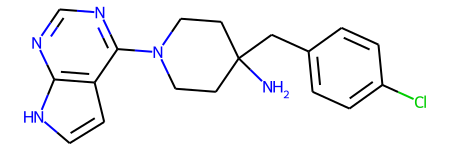

In [59]:
m

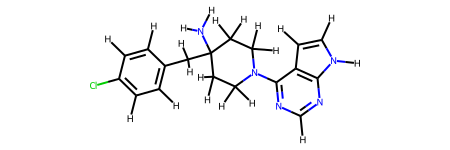

In [60]:
m2=AllChem.AddHs(m)
m2

In [66]:
AllChem.EmbedMolecule(m2, useBasicKnowledge=True)
AllChem.UFFOptimizeMolecule(m2)

0

In [ ]:
AllChem.

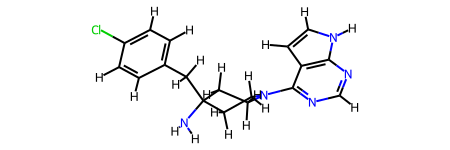

In [67]:
m2

In [ ]:
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

In [ ]:
chosen_descriptors = [
    'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v',
    'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2',
    'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8',
    'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3',
    'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2',
    'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 
    'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex',
    'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
    'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles',
    'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons',
    'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings',
    'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 
    'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7',
    'PEOE_VSA8', 'PEOE_VSA9', 'RingCount', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3',
    'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 
    'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 
    'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1',
    'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6',
    'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 
    'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O',
    'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O',
    'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde',
    'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine',
    'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene',
    'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide',
    'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone',
    'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss',
    'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro',
    'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime',
    'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid',
    'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd',
    'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'qed'
]


In [ ]:
smi_based = np.array(list(mol_descriptor_calculator.CalcDescriptors(m)))

ff_based = np.array(list(mol_descriptor_calculator.CalcDescriptors(m2)))

In [ ]:
mask = np.abs((smi_based - ff_based)/(ff_based+0.01)) > 0.2

In [ ]:
np.array(chosen_descriptors)[mask]

In [ ]:
from rdkit.Chem import Descriptors3D 

In [ ]:
rdMolDescriptors.CalcEEMcharges(m)

# Compute descriptors

## Generate 3D

In [ ]:
# TODO it later 
all_mols_modif = []
for m in tqdm(mols):
    m2 = Chem.AddHs(m)
    AllChem.EmbedMolecule(m2)
    # AllChem.MMFFOptimizeMolecule(m2)
    AllChem.MMFFOptimizeMoleculeConfs(m2, numThreads=0)
    all_mols_modif.append(m2)

In [ ]:
all_mols_modif[50]

## Calc descr

In [27]:
mol_descriptor_calculator = MolecularDescriptorCalculator(some_descriptors)
all_des = []

for m in tqdm(mols):
    d = list(mol_descriptor_calculator.CalcDescriptors(m))
    all_des.append(d)
all_des = np.array(all_des)

 24%|██▍       | 299/1237 [00:02<00:08, 114.57it/s]Traceback (most recent call last):
  File "/home/dima/miniconda3/envs/chem/lib/python3.10/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/dima/miniconda3/envs/chem/lib/python3.10/site-packages/rdkit/Chem/Descriptors.py", line 95, in <lambda>
    ExactMolWt = lambda *x, **y: _rdMolDescriptors.CalcExactMolWt(*x, **y)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcExactMolWt(NoneType)
did not match C++ signature:
    CalcExactMolWt(RDKit::ROMol mol, bool onlyHeavy=False)
Traceback (most recent call last):
  File "/home/dima/miniconda3/envs/chem/lib/python3.10/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/dima/miniconda3/envs/chem/lib/python3.10/site-packages/rdkit/Chem/Descriptors.py", line 211, in FpDensityMorgan1
    return _FingerprintDensity(x,

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/dima/miniconda3/envs/chem/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_22076/871335697.py", line 5, in <cell line: 4>
    d = list(mol_descriptor_calculator.CalcDescriptors(m))
  File "/home/dima/miniconda3/envs/chem/lib/python3.10/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/home/dima/miniconda3/envs/chem/lib/python3.10/site-packages/rdkit/Chem/EState/EState.py", line 90, in MaxAbsEStateIndex
    return max(abs(x) for x in EStateIndices(mol, force))
  File "/home/dima/miniconda3/envs/chem/lib/python3.10/site-packages/rdkit/Chem/EState/EState.py", line -1, in EStateIndices
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/dima/miniconda3/envs/chem/lib/python3.10/s

In [ ]:
df_des = pd.DataFrame(all_des)
df_des.columns = some_descriptors

In [ ]:
df_des.shape

In [ ]:
# ind_names

In [ ]:
df_des.dropna(axis=1, inplace=True)
df_des['Id'] = ind_names

In [ ]:
df_des.to_csv('../data/derived/rdkit_3d_des.csv', index=False)
